<h1>Multimodal Image Retrieving System</h1>

<h3>Step 1: Image dataset </h3>

In [1]:
import pandas as pd

img_df = pd.read_csv('../sample_imagesv2/sample_images.csv')
img_df.head()

,file_name
0,5dec6d6e40bd4d6bb3016f05bef8c3ae.jpg
1,5104d2b1073347a7acf5a7cc0d5e1d19.jpg
2,f73e688021f04f128db6f1f399244d9b.jpg
3,20c657d94d5b4993a2e04879c8bdcf0d.jpg
4,7defda9553cd45c0aecad952d6eb8fa0.jpg


In [2]:
print('Number of Images:',len(img_df))

Number of Images: 500


In [3]:
img_df.iloc[1].file_name

'5104d2b1073347a7acf5a7cc0d5e1d19.jpg'

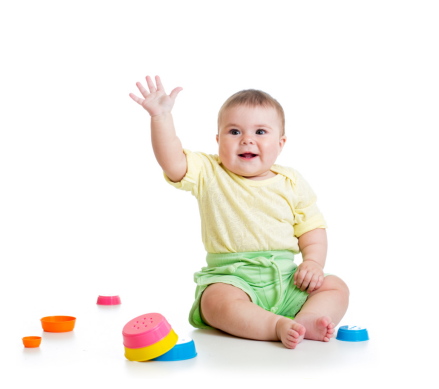

In [4]:
id = 0
image_name = img_df.iloc[id].file_name

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_filename = '../sample_imagesv2/'+image_name
#image_filename = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
img = mpimg.imread(image_filename)
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

<h2>Step 2: Image Tagging using BLIP Caption Modelling</h2>

In [5]:
"""
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))
# >>> a photography of a woman and her dog

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))
"""

'\nimport requests\nfrom PIL import Image\nfrom transformers import BlipProcessor, BlipForConditionalGeneration\n\nprocessor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")\nmodel = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")\n\nimg_url = \'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg\' \nraw_image = Image.open(requests.get(img_url, stream=True).raw).convert(\'RGB\')\n\n# conditional image captioning\ntext = "a photography of"\ninputs = processor(raw_image, text, return_tensors="pt")\n\nout = model.generate(**inputs)\nprint(processor.decode(out[0], skip_special_tokens=True))\n# >>> a photography of a woman and her dog\n\n# unconditional image captioning\ninputs = processor(raw_image, return_tensors="pt")\n\nout = model.generate(**inputs)\nprint(processor.decode(out[0], skip_special_tokens=True))\n'

In [6]:
#https://huggingface.co/nlpconnect/vit-gpt2-image-captioning

In [7]:

from transformers import pipeline

image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

image_to_text("https://ankur3107.github.io/assets/images/image-captioning-example.png")

# [{'generated_text': 'a soccer game with a player jumping to catch the ball '}]


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.48.3"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

[{'generated_text': '!!!!!!!!!!!!!!!!!!!!'}]

In [8]:

image_to_text("https://images.hindustantimes.com/rf/image_size_640x362/HT/p2/2016/09/15/Pictures/happier-person-shows-sharing-smiling-selfies-makes_a841c3b6-7b06-11e6-8cf4-f1fcbcc69a66.jpg")

[{'generated_text': '!!!!!!!!!!!!!!!!!!!!'}]

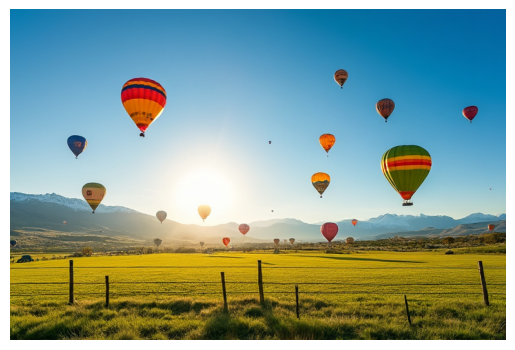

In [9]:
id = 7
image_name = img_df.iloc[id].file_name

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_filename = '../sample_imagesv2/'+image_name
#image_filename = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
img = mpimg.imread(image_filename)
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

<h2>Sample Dataset Tagging</h2>

In [10]:
img_df['tagging_vitgpt2'] = ''

In [11]:
Ns = len(img_df)
for i in range(Ns):
    image_name = img_df.iloc[i].file_name
    image_filename = '../sample_images/'+image_name
    tag_res = image_to_text(image_filename)
    tag_desc = tag_res[0]['generated_text']
    img_df.at[i,'tagging_vitgpt2'] = tag_desc
    
    print('Tagging %d = %s -> Completion time %d/%d'%(i+1,tag_desc, i+1,Ns),end='\r')

ValueError: Incorrect image source. Must be a valid URL starting with `http://` or `https://`, a valid path to an image file, or a base64 encoded string. Got ../sample_images/5dec6d6e40bd4d6bb3016f05bef8c3ae.jpg. Failed with Invalid base64-encoded string: number of data characters (49) cannot be 1 more than a multiple of 4

In [ ]:
#Save results
from datetime import datetime
# Get the current date and time
now = datetime.now()
timestamp_str = now.strftime('%Y_%m_%d_%H_%M_%S')
title_ = 'sample_dataset_tagged_%s.csv'%timestamp_str
img_df.to_csv(title_,index=False)
print(title_,'succesfully saved')

In [ ]:
img_df.head()